In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('covid_19_india.csv')
data

Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
16845  16846  2021-07-07  8:00 AM            Telangana   
16846  16847  2021-07-07  8:00 AM              Tripura   
16847  16848  2021-07-07  8:00 AM          Uttarakhand   
16848  16849  2021-07-07  8:00 AM        Uttar Pradesh   
16849  16850  2021-07-07  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2                        0        0       0   
3                           3                        0        0       0   
4                           3                        0        0       0   
...                       ...                      ...      ...     ...   
16845                       -                        -   613124    3703   
16846                       -                        -    63964     701   
16847                       -                        -   332006    7338   
16848                       -                        -  1682130   22656   
16849                       -                        -  1472132   17834   

       Confirmed  
0              1  
1              1  
2              2  
3              3  
4              3  
...          ...  
16845     628282  
16846      68612  
16847     340882  
16848    1706818  
16849    1507241  

[16850 rows x 9 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
data.describe()

Sno         Cured         Deaths     Confirmed
count  16850.000000  1.685000e+04   16850.000000  1.685000e+04
mean    8425.500000  2.360353e+05    3485.222552  2.583667e+05
std     4864.320353  5.225438e+05    9330.541749  5.672808e+05
min        1.000000  0.000000e+00       0.000000  0.000000e+00
25%     4213.250000  2.658500e+03      22.000000  3.644750e+03
50%     8425.500000  2.889500e+04     453.000000  3.336150e+04
75%    12637.750000  2.537510e+05    3071.250000  2.666530e+05
max    16850.000000  5.872268e+06  123531.000000  6.113335e+06

In [6]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

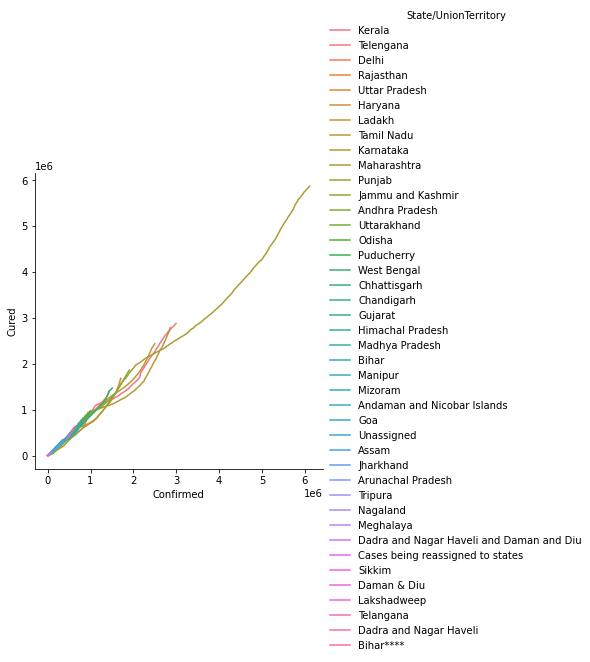

In [16]:
fig=plt.figure(figsize=(10,10))
sns.relplot(x='Confirmed',y='Cured',hue=data['State/UnionTerritory'],data=data,kind='line')
plt.show()

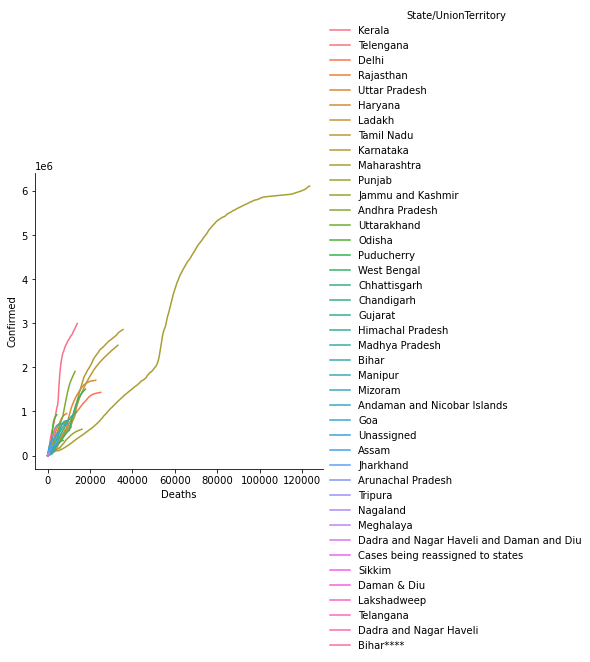

In [18]:
sns.relplot(y='Confirmed',x='Deaths',hue=data['State/UnionTerritory'],data=data,kind='line')

In [19]:
covid19=data.copy()
covid19

Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
16845  16846  2021-07-07  8:00 AM            Telangana   
16846  16847  2021-07-07  8:00 AM              Tripura   
16847  16848  2021-07-07  8:00 AM          Uttarakhand   
16848  16849  2021-07-07  8:00 AM        Uttar Pradesh   
16849  16850  2021-07-07  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2                        0        0       0   
3                           3                        0        0       0   
4                           3                        0        0       0   
...                       ...                      ...      ...     ...   
16845                       -                        -   613124    3703   
16846                       -                        -    63964     701   
16847                       -                        -   332006    7338   
16848                       -                        -  1682130   22656   
16849                       -                        -  1472132   17834   

       Confirmed  
0              1  
1              1  
2              2  
3              3  
4              3  
...          ...  
16845     628282  
16846      68612  
16847     340882  
16848    1706818  
16849    1507241  

[16850 rows x 9 columns]

In [20]:
covid19['Active'] = covid19['Confirmed'] - (covid19['Cured'] + covid19['Deaths'])
covid19

Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
16845  16846  2021-07-07  8:00 AM            Telangana   
16846  16847  2021-07-07  8:00 AM              Tripura   
16847  16848  2021-07-07  8:00 AM          Uttarakhand   
16848  16849  2021-07-07  8:00 AM        Uttar Pradesh   
16849  16850  2021-07-07  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2                        0        0       0   
3                           3                        0        0       0   
4                           3                        0        0       0   
...                       ...                      ...      ...     ...   
16845                       -                        -   613124    3703   
16846                       -                        -    63964     701   
16847                       -                        -   332006    7338   
16848                       -                        -  1682130   22656   
16849                       -                        -  1472132   17834   

       Confirmed  Active  
0              1       1  
1              1       1  
2              2       2  
3              3       3  
4              3       3  
...          ...     ...  
16845     628282   11455  
16846      68612    3947  
16847     340882    1538  
16848    1706818    2032  
16849    1507241   17275  

[16850 rows x 10 columns]

In [21]:
covid19.drop(columns = ['Sno','ConfirmedIndianNational','ConfirmedForeignNational'], inplace=True)

In [22]:
covid19['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

# Data Cleansing

In [23]:
covid19.loc[covid19['State/UnionTerritory']=='Bihar****','State/UnionTerritory']='Bihar'

In [24]:
covid19.loc[covid19['State/UnionTerritory']=='Daman & Diu','State/UnionTerritory']='Dadra and Nagar Haveli and Daman and Diu'

In [25]:
covid19.loc[covid19['State/UnionTerritory']=='Dadra and Nagar Haveli','State/UnionTerritory']='Dadra and Nagar Haveli and Daman and Diu'

In [26]:
covid19.loc[covid19['State/UnionTerritory']=='Telengana','State/UnionTerritory']='Telangana'

In [27]:
covid19.groupby('State/UnionTerritory').sum()

Cured    Deaths  Confirmed  \
State/UnionTerritory                                                       
Andaman and Nicobar Islands                 1589935     22624    1675248   
Andhra Pradesh                            303427899   2475816  324146783   
Arunachal Pradesh                           5150519     19303    5598324   
Assam                                      74011348    459575   80418492   
Bihar                                     101533848    775163  108312449   
Cases being reassigned to states                  0         0     345565   
Chandigarh                                  7980284    119356    8691806   
Chhattisgarh                              117163544   1591126  128751782   
Dadra and Nagar Haveli and Daman and Diu    1491338       882    1587570   
Delhi                                     224062704   4066907  236972842   
Goa                                        20224042    338359   22280065   
Gujarat                                   103995131   1866811  114557615   
Haryana                                   100010131   1166573  107408371   
Himachal Pradesh                           20682770    371931   23052151   
Jammu and Kashmir                          42295048    686680   46899925   
Jharkhand                                  46083978    569298   49971564   
Karnataka                                 345648926   4819018  387597335   
Kerala                                    311127643   1327754  344319045   
Ladakh                                      3059045     38578    3344131   
Lakshadweep                                  471712      2178     561459   
Madhya Pradesh                            100169697   1427780  108712983   
Maharashtra                               813788907  19314532  908892470   
Manipur                                     8420223    122089    9440912   
Meghalaya                                   4606548     66293    5221064   
Mizoram                                     1534630      5073    1822190   
Nagaland                                    3628619     39420    4089547   
Odisha                                    117984789    600149  126408397   
Puducherry                                 14376916    249683   15858688   
Punjab                                     71108712   2216735   78999515   
Rajasthan                                 117312772   1159823  128998101   
Sikkim                                      1983899     41530    2315519   
Tamil Nadu                                317067499   4731627  342829697   
Telangana                                 100211245    617882  108152726   
Tripura                                    10479169    124444   11397656   
Unassigned                                        0         0        161   
Uttar Pradesh                             232529439   3347656  252843682   
Uttarakhand                                36684388    728512   41179396   
West Bengal                               195296839   3214840  209822848   

                                            Active  
State/UnionTerritory                                
Andaman and Nicobar Islands                  62689  
Andhra Pradesh                            18243068  
Arunachal Pradesh                           428502  
Assam                                      5947569  
Bihar                                      6003438  
Cases being reassigned to states            345565  
Chandigarh                                  592166  
Chhattisgarh                               9997112  
Dadra and Nagar Haveli and Daman and Diu     95350  
Delhi                                      8843231  
Goa                                        1717664  
Gujarat                                    8695673  
Haryana                                    6231667  
Himachal Pradesh                           1997450  
Jammu and Kashmir                          3918197  
Jharkhand                                  3318288  
Karnataka                                 37129391 

# India Covid-19 Statewise Data with Visualization

In [28]:
allstates=covid19["State/UnionTerritory"].value_counts()
allstates

Kerala                                      525
Delhi                                       493
Telangana                                   493
Rajasthan                                   492
Uttar Pradesh                               491
Haryana                                     491
Ladakh                                      488
Tamil Nadu                                  488
Punjab                                      486
Jammu and Kashmir                           486
Maharashtra                                 486
Karnataka                                   486
Andhra Pradesh                              483
Uttarakhand                                 480
Odisha                                      479
Puducherry                                  477
West Bengal                                 477
Chhattisgarh                                476
Chandigarh                                  476
Gujarat                                     475
Himachal Pradesh                        

In [29]:
top5_states_count=allstates.head()
top5_states_count

Kerala           525
Delhi            493
Telangana        493
Rajasthan        492
Uttar Pradesh    491
Name: State/UnionTerritory, dtype: int64

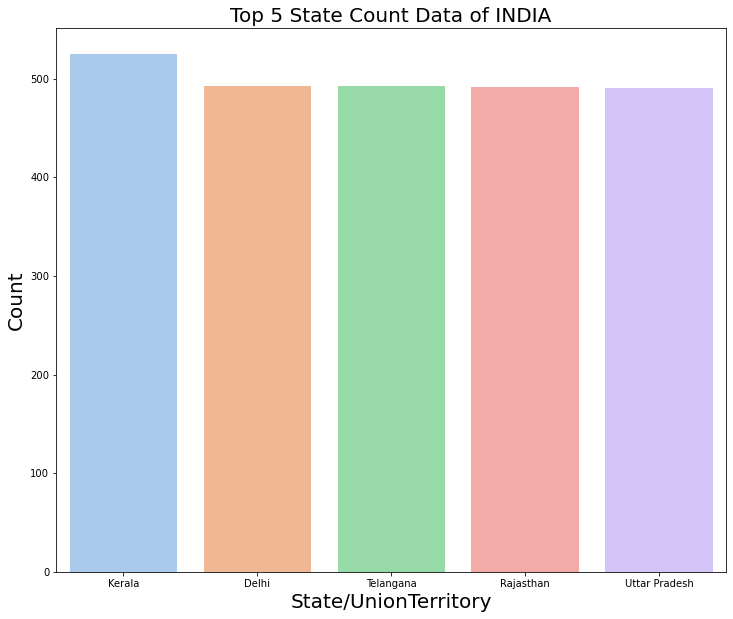

In [30]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)


sns.barplot(x=top5_states_count.index,y=top5_states_count.values,palette='pastel') 
plt.xlabel('State/UnionTerritory',size=20)
plt.ylabel('Count',size=20)
plt.title("Top 5 State Count Data of INDIA",size=20)
plt.show()

In [31]:
total_cured_sum=covid19['Cured'].sum()
total_cured_sum

3977194136

In [32]:
total_deaths_sum=covid19['Deaths'].sum()
total_deaths_sum

58726000

In [33]:
total_confirmed_sum= covid19['Confirmed'].sum()
total_confirmed_sum

4353478074

In [34]:
total_active_cases_sum=covid19['Active'].sum()
total_active_cases_sum

317557938

In [35]:
result=np.array([total_cured_sum,total_deaths_sum,total_confirmed_sum,total_active_cases_sum])
lable = ["Total Cured","Total Deaths","Total Confirmed","Active Cases"]
e = [0.0,0.2,0.0,0.1]

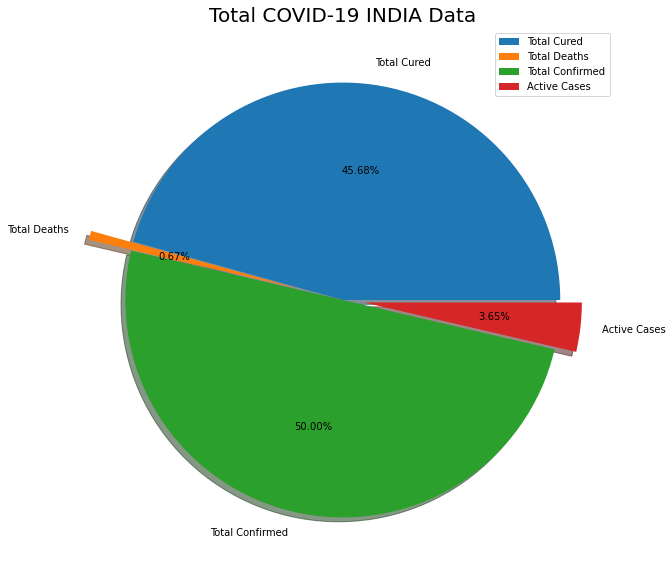

In [36]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)

plt.pie(result,labels=lable,autopct='%1.2f%%',explode=e,shadow=True)
plt.title("Total COVID-19 INDIA Data",size=20,color='k')
plt.legend(lable)
plt.show()

In [37]:
covid19

Date     Time State/UnionTerritory    Cured  Deaths  Confirmed  \
0      2020-01-30  6:00 PM               Kerala        0       0          1   
1      2020-01-31  6:00 PM               Kerala        0       0          1   
2      2020-02-01  6:00 PM               Kerala        0       0          2   
3      2020-02-02  6:00 PM               Kerala        0       0          3   
4      2020-02-03  6:00 PM               Kerala        0       0          3   
...           ...      ...                  ...      ...     ...        ...   
16845  2021-07-07  8:00 AM            Telangana   613124    3703     628282   
16846  2021-07-07  8:00 AM              Tripura    63964     701      68612   
16847  2021-07-07  8:00 AM          Uttarakhand   332006    7338     340882   
16848  2021-07-07  8:00 AM        Uttar Pradesh  1682130   22656    1706818   
16849  2021-07-07  8:00 AM          West Bengal  1472132   17834    1507241   

       Active  
0           1  
1           1  
2           2  
3           3  
4           3  
...       ...  
16845   11455  
16846    3947  
16847    1538  
16848    2032  
16849   17275  

[16850 rows x 7 columns]

In [38]:
allstates_max=covid19.groupby('State/UnionTerritory')[['Active','Cured', 'Deaths', 'Confirmed']].max().sort_values(by='Confirmed', ascending=False)
allstates_max=allstates_max.reset_index()
allstates_max

State/UnionTerritory  Active    Cured  Deaths  \
0                                Maharashtra  701614  5872268  123531   
1                                     Kerala  445692  2877557   13960   
2                                  Karnataka  605515  2784030   35526   
3                                 Tamil Nadu  313048  2435872   33132   
4                             Andhra Pradesh  211554  1861937   12898   
5                              Uttar Pradesh  310783  1682130   22656   
6                                West Bengal  132181  1472132   17834   
7                                      Delhi  103424  1408853   25001   
8                               Chhattisgarh  131245   977893   13462   
9                                  Rajasthan  212753   942882    8942   
10                                    Odisha  106493   897362    4299   
11                                   Gujarat  148297   811699   10072   
12                            Madhya Pradesh  111366   780578    9017   
13                                   Haryana  116867   758442    9506   
14                                     Bihar  115152   711913    9612   
15                                 Telangana   80695   613124    3703   
16                                    Punjab   79963   578590   16131   
17                                     Assam   56295   493306    4717   
18                                 Jharkhand   61195   340365    5118   
19                               Uttarakhand   80000   332006    7338   
20                         Jammu and Kashmir   52848   309554    4345   
21                          Himachal Pradesh   40008   198134    3485   
22                                       Goa   32953   162787    3079   
23                                Puducherry   18277   114673    1763   
24                                   Manipur    9613    66132    1218   
25                                   Tripura    8302    63964     701   
26                                Chandigarh    8653    60837     809   
27                                 Meghalaya    8255    47173     880   
28                         Arunachal Pradesh    3918    34525     181   
29                                  Nagaland    5049    23982     503   
30                                   Mizoram    4471    18383      98   
31                                    Sikkim    4306    19200     309   
32                                    Ladakh    2041    19733     204   
33  Dadra and Nagar Haveli and Daman and Diu    2081    10532       4   
34                               Lakshadweep    2320     9643      49   
35          Cases being reassigned to states    9265        0       0   
36               Andaman and Nicobar Islands    1154     7343     128   
37                                Unassigned      77        0       0   

    Confirmed  
0     6113335  
1     2996094  
2     2859595  
3     2503481  
4     1908065  
5     1706818  
6     1507241  
7     1434687  
8      996359  
9      952836  
10     927186  
11     823964  
12     790042  
13     769030  
14     722746  
15     628282  
16     596736  
17     522267  
18     346038  
19     340882  
20     317481  
21     202945  
22     167823  
23     118227  
24      73581  
25      68612  
26      61752  
27      52358  
28      37879  
29      25619  
30      22155  
31      21403  
32      20137  
33      10575  
34       9947  
35       9265  
36       7487  
37         77

In [39]:
top_10=allstates_max.head(10)
top_10

State/UnionTerritory  Active    Cured  Deaths  Confirmed
0          Maharashtra  701614  5872268  123531    6113335
1               Kerala  445692  2877557   13960    2996094
2            Karnataka  605515  2784030   35526    2859595
3           Tamil Nadu  313048  2435872   33132    2503481
4       Andhra Pradesh  211554  1861937   12898    1908065
5        Uttar Pradesh  310783  1682130   22656    1706818
6          West Bengal  132181  1472132   17834    1507241
7                Delhi  103424  1408853   25001    1434687
8         Chhattisgarh  131245   977893   13462     996359
9            Rajasthan  212753   942882    8942     952836

In [40]:
top_10.columns

Index(['State/UnionTerritory', 'Active', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

<Figure size 720x432 with 0 Axes>

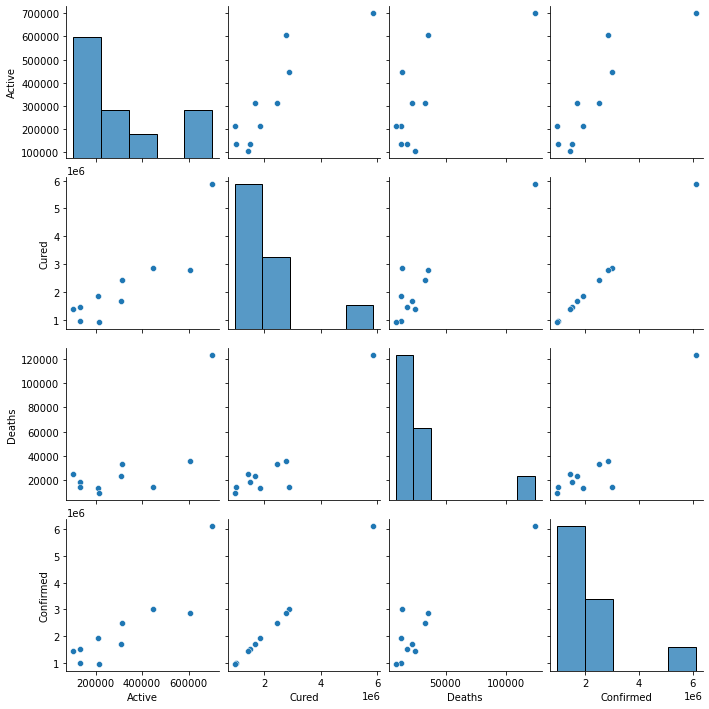

In [41]:

fig=plt.figure(figsize=(10,6))
sns.pairplot(top_10)
plt.show()

In [42]:
px.bar(allstates_max,x='State/UnionTerritory', y='Confirmed',
       title="India State Wise Confirmed Cases",
       labels={'Confirmed':'Confirmed Cases'},
      color='State/UnionTerritory',
      height=800)

In [43]:
px.bar(allstates_max,x='State/UnionTerritory', y='Cured',
       title="India State Wise Cured Cases",
       labels={'Cured':'Cured Cases'},
      color='State/UnionTerritory',
      height=800)

In [44]:
px.bar(allstates_max,x='State/UnionTerritory', y='Deaths',
       title="India State Wise Deaths Cases",
       labels={'Deaths':'Deaths Cases'},
      color='State/UnionTerritory',
      height=800)

In [45]:
px.bar(allstates_max,x='State/UnionTerritory', y='Active',
       title="India State Wise Active Cases",
       labels={'Active':'Active Cases'},
      color='State/UnionTerritory',
      height=800)

In [46]:
active_case = covid19.groupby('State/UnionTerritory').max()[['Active', 'Date']].sort_values(by=['Active'],ascending=False).reset_index()
active_case.head(10)

State/UnionTerritory  Active        Date
0          Maharashtra  701614  2021-07-07
1            Karnataka  605515  2021-07-07
2               Kerala  445692  2021-07-07
3           Tamil Nadu  313048  2021-07-07
4        Uttar Pradesh  310783  2021-07-07
5            Rajasthan  212753  2021-07-07
6       Andhra Pradesh  211554  2021-07-07
7              Gujarat  148297  2021-07-07
8          West Bengal  132181  2021-07-07
9         Chhattisgarh  131245  2021-07-07

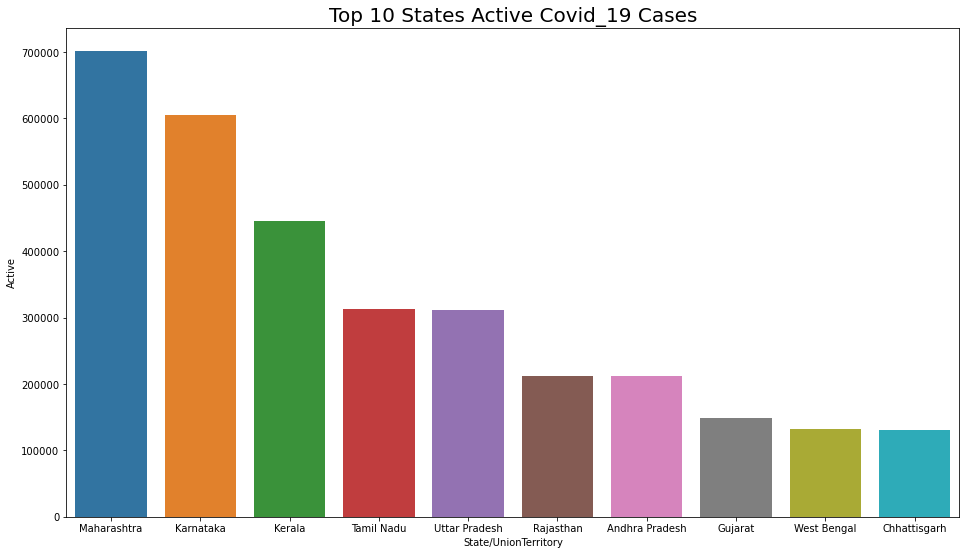

In [156]:
fig = plt.figure(figsize=(16,9))
sns.barplot(data=active_case.head(10),x='State/UnionTerritory',y='Active')
plt.title("Top 10 States Active Covid_19 Cases",size=20)
plt.show()

In [48]:
cured_rate = (total_cured_sum/total_confirmed_sum)*100
cured_rate

91.35670533757235

In [49]:
death_rate = (total_deaths_sum/total_confirmed_sum)*100
death_rate

1.3489444302183478

In [50]:
active_rate = (total_active_cases_sum/total_confirmed_sum)*100
active_rate

7.294350232209301

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



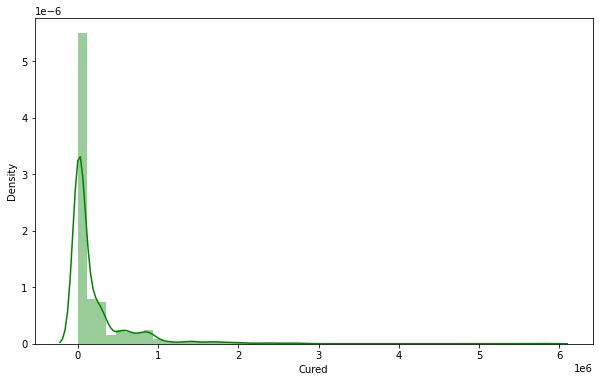

In [51]:
fig = plt.figure(figsize=(10,6))
sns.distplot(covid19['Cured'],kde=True,color='green')
plt.show()

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



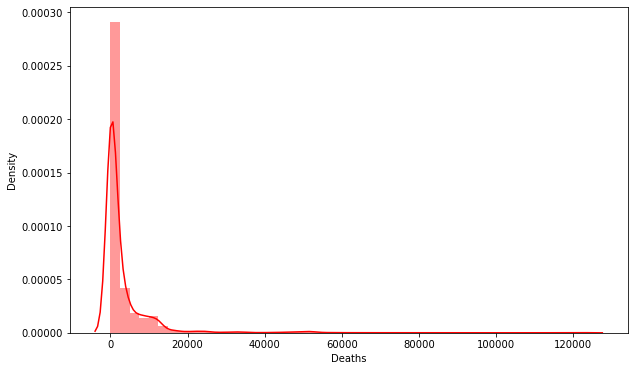

In [52]:
fig = plt.figure(figsize=(10,6))
sns.distplot(covid19['Deaths'],kde=True,color='red')
plt.show()

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



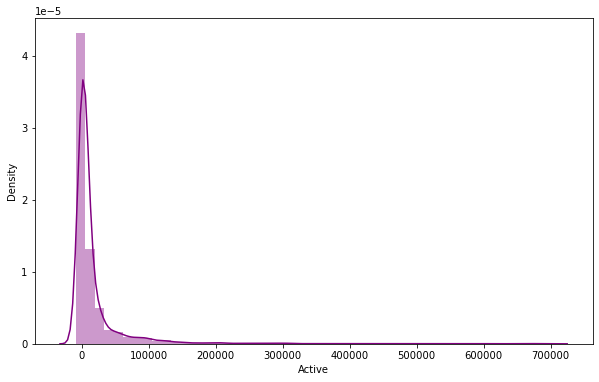

In [53]:
fig = plt.figure(figsize=(10,6))
sns.distplot(covid19['Active'],kde=True,color='purple')
plt.show()

# Analyzing Date Wise India Covid-19 Data

In [54]:
covid19["Date"] = pd.to_datetime(covid19["Date"], format = "%Y-%m-%d")
covid19['Year']= pd.DatetimeIndex(covid19['Date']).year
covid19['Month']= pd.DatetimeIndex(covid19['Date']).month
covid19['Day']= pd.DatetimeIndex(covid19['Date']).day


In [55]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16850 non-null  datetime64[ns]
 1   Time                  16850 non-null  object        
 2   State/UnionTerritory  16850 non-null  object        
 3   Cured                 16850 non-null  int64         
 4   Deaths                16850 non-null  int64         
 5   Confirmed             16850 non-null  int64         
 6   Active                16850 non-null  int64         
 7   Year                  16850 non-null  int64         
 8   Month                 16850 non-null  int64         
 9   Day                   16850 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 1.3+ MB


In [68]:
covid19

Date     Time State/UnionTerritory    Cured  Deaths  Confirmed  \
0     2020-01-30  6:00 PM               Kerala        0       0          1   
1     2020-01-31  6:00 PM               Kerala        0       0          1   
2     2020-02-01  6:00 PM               Kerala        0       0          2   
3     2020-02-02  6:00 PM               Kerala        0       0          3   
4     2020-02-03  6:00 PM               Kerala        0       0          3   
...          ...      ...                  ...      ...     ...        ...   
16845 2021-07-07  8:00 AM            Telangana   613124    3703     628282   
16846 2021-07-07  8:00 AM              Tripura    63964     701      68612   
16847 2021-07-07  8:00 AM          Uttarakhand   332006    7338     340882   
16848 2021-07-07  8:00 AM        Uttar Pradesh  1682130   22656    1706818   
16849 2021-07-07  8:00 AM          West Bengal  1472132   17834    1507241   

       Active  Year  Month  Day  
0           1  2020      1   30  
1           1  2020      1   31  
2           2  2020      2    1  
3           3  2020      2    2  
4           3  2020      2    3  
...       ...   ...    ...  ...  
16845   11455  2021      7    7  
16846    3947  2021      7    7  
16847    1538  2021      7    7  
16848    2032  2021      7    7  
16849   17275  2021      7    7  

[16850 rows x 10 columns]

In [56]:
covid19['Year'].unique()

array([2020, 2021], dtype=int64)

In [57]:
yearly_data=covid19.groupby('Year')[['Cured','Deaths','Active','Confirmed']].sum().reset_index()
yearly_data

Year       Cured    Deaths     Active   Confirmed
0  2020   941314195  17022508  115686078  1074022781
1  2021  3035879941  41703492  201871860  3279455293

In [154]:
px.bar(yearly_data, x='Year', y=['Cured','Deaths','Active'],labels={'value':'Total Cases'},
      title="India Year Wise Cases 2020 Vs 2021")

In [59]:
px.bar(yearly_data, x='Deaths', y='Confirmed',
      hover_name='Year',
      labels={'Confirmed':'Total Confirmed'},
      title="India Year Wise Deaths Cases 2020 Vs 2021"
      )

In [60]:
px.bar(yearly_data, x='Active', y='Confirmed',
      hover_name='Year',
      labels={'Confirmed':'Total Confirmed'},
      title="India Year Wise Active Cases 2020 Vs 2021")

In [61]:
px.bar(yearly_data, x='Cured', y='Confirmed',
      hover_name='Year',
      labels={'Confirmed':'Total Confirmed'},
      title="India Year Wise Cured Cases 2020 Vs 2021")

In [157]:
allstates_yearly_data=covid19.groupby(['State/UnionTerritory','Year'])[['Cured','Deaths','Active','Confirmed']].sum().reset_index()
allstates_yearly_data

State/UnionTerritory  Year      Cured   Deaths    Active  Confirmed
0   Andaman and Nicobar Islands  2020     534731     7772     48335     590838
1   Andaman and Nicobar Islands  2021    1055204    14852     14354    1084410
2                Andhra Pradesh  2020   95094768   871178   8168120  104134066
3                Andhra Pradesh  2021  208333131  1604638  10074948  220012717
4             Arunachal Pradesh  2020    1442769     4488    232251    1679508
..                          ...   ...        ...      ...       ...        ...
69                Uttar Pradesh  2021  177050153  2411300  10493519  189954972
70                  Uttarakhand  2020    6864570   121701    973986    7960257
71                  Uttarakhand  2021   29819818   606811   2792510   33219139
72                  West Bengal  2020   44508487   941478   4645244   50095209
73                  West Bengal  2021  150788352  2273362   6665925  159727639

[74 rows x 6 columns]

In [165]:
px.bar(allstates_yearly_data,x='State/UnionTerritory', y=['Confirmed','Deaths','Cured','Active'],labels={'value':'Total Cases'},
        hover_data=['Year'],title='All States Yearly Covid-19 Cases in India', height=800)

In [166]:
allstates_monthly_data=covid19.groupby(['State/UnionTerritory','Month'])[['Cured','Deaths','Active','Confirmed']].sum().reset_index()
allstates_monthly_data

State/UnionTerritory  Month     Cured  Deaths  Active  Confirmed
0    Andaman and Nicobar Islands      1    151473    1922     792     154187
1    Andaman and Nicobar Islands      2    138309    1736     164     140209
2    Andaman and Nicobar Islands      3    153888    1922     280     156090
3    Andaman and Nicobar Islands      4    155615    1905    3320     160840
4    Andaman and Nicobar Islands      5    194448    2728    6936     204112
..                           ...    ...       ...     ...     ...        ...
428                  West Bengal      8   2668216   73557  795791    3537564
429                  West Bengal      9   5379943  121453  731518    6232914
430                  West Bengal     10   8463405  181984  998450    9643839
431                  West Bengal     11  11728981  228800  904434   12862215
432                  West Bengal     12  15314155  282550  614339   16211044

[433 rows x 6 columns]

In [168]:
px.bar(allstates_monthly_data,x='State/UnionTerritory', y=['Confirmed','Deaths','Cured','Active'],labels={'value':'Total Cases'},
        hover_data=['Month'],title='All States Monthly Covid-19 Cases in India', height=800)

In [83]:
india_datewise = covid19.groupby('Date')[['Confirmed','Cured','Deaths','Active']].sum().reset_index()
india_datewise

Date  Confirmed     Cured  Deaths  Active
0   2020-01-30          1         0       0       1
1   2020-01-31          1         0       0       1
2   2020-02-01          2         0       0       2
3   2020-02-02          3         0       0       3
4   2020-02-03          3         0       0       3
..         ...        ...       ...     ...     ...
520 2021-07-03   30502362  29605779  401050  495533
521 2021-07-04   30545433  29658078  402005  485350
522 2021-07-05   30585229  29700430  402728  482071
523 2021-07-06   30619932  29752294  403281  464357
524 2021-07-07   30663665  29799534  404211  459920

[525 rows x 5 columns]

In [155]:
px.line(india_datewise,x='Date', y=['Confirmed','Cured','Deaths','Active'],labels={'value':'Total Cases'},
        title='Date Wise Covid-19 Cases in India', height=800)

In [133]:
india_time_wise = covid19.groupby('Time')[['Confirmed','Cured','Deaths','Active']].sum().reset_index()
india_time_wise

Time   Confirmed       Cured    Deaths     Active
0  10:00 AM         724          67        17        640
1   5:00 PM      602073      128646     19369     454058
2   6:00 PM       25714        1898       600      23216
3   7:30 PM        2858         240        68       2550
4   8:00 AM  4352844057  3977063059  58705880  317075118
5   8:30 PM        1397         124        35       1238
6   9:30 PM        1251         102        31       1118

In [134]:
px.line(india_time_wise,x='Time', y=['Confirmed','Cured','Deaths','Active'],labels={'value':'Total Cases'},
        title='Covid-19 Time Wise Cases in India', height=800)

# India Covid-19 Data of Maharashtra State

In [87]:
maha= covid19[covid19["State/UnionTerritory"] == 'Maharashtra']
maha

Date     Time State/UnionTerritory    Cured  Deaths  Confirmed  \
76    2020-03-09  6:00 PM          Maharashtra        0       0          2   
91    2020-03-10  6:00 PM          Maharashtra        0       0          5   
97    2020-03-11  6:00 PM          Maharashtra        0       0          2   
120   2020-03-12  6:00 PM          Maharashtra        0       0         11   
133   2020-03-13  6:00 PM          Maharashtra        0       0         14   
...          ...      ...                  ...      ...     ...        ...   
16690 2021-07-03  8:00 AM          Maharashtra  5836920  122353    6079352   
16726 2021-07-04  8:00 AM          Maharashtra  5845315  122724    6088841   
16762 2021-07-05  8:00 AM          Maharashtra  5848693  123030    6098177   
16798 2021-07-06  8:00 AM          Maharashtra  5861720  123136    6104917   
16834 2021-07-07  8:00 AM          Maharashtra  5872268  123531    6113335   

       Active  Year  Month  Day  
76          2  2020      3    9  
91          5  2020      3   10  
97          2  2020      3   11  
120        11  2020      3   12  
133        14  2020      3   13  
...       ...   ...    ...  ...  
16690  120079  2021      7    3  
16726  120802  2021      7    4  
16762  126454  2021      7    5  
16798  120061  2021      7    6  
16834  117536  2021      7    7  

[486 rows x 10 columns]

In [88]:
maha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 76 to 16834
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  486 non-null    datetime64[ns]
 1   Time                  486 non-null    object        
 2   State/UnionTerritory  486 non-null    object        
 3   Cured                 486 non-null    int64         
 4   Deaths                486 non-null    int64         
 5   Confirmed             486 non-null    int64         
 6   Active                486 non-null    int64         
 7   Year                  486 non-null    int64         
 8   Month                 486 non-null    int64         
 9   Day                   486 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 41.8+ KB


In [89]:
maha.describe()

Cured         Deaths     Confirmed         Active         Year  \
count  4.860000e+02     486.000000  4.860000e+02     486.000000   486.000000   
mean   1.674463e+06   39741.835391  1.870149e+06  155944.508230  2020.386831   
std    1.710989e+06   31861.231600  1.831266e+06  168833.300211     0.487526   
min    0.000000e+00       0.000000  2.000000e+00       2.000000  2020.000000   
25%    1.197165e+05    9299.500000  2.187718e+05   46101.000000  2020.000000   
50%    1.556812e+06   44884.500000  1.706879e+06   96492.500000  2020.000000   
75%    2.066541e+06   52468.500000  2.216942e+06  193650.750000  2021.000000   
max    5.872268e+06  123531.000000  6.113335e+06  701614.000000  2021.000000   

            Month         Day  
count  486.000000  486.000000  
mean     6.080247   15.744856  
std      3.146548    8.810065  
min      1.000000    1.000000  
25%      4.000000    8.000000  
50%      6.000000   16.000000  
75%      8.750000   23.000000  
max     12.000000   31.000000

<Figure size 720x432 with 0 Axes>

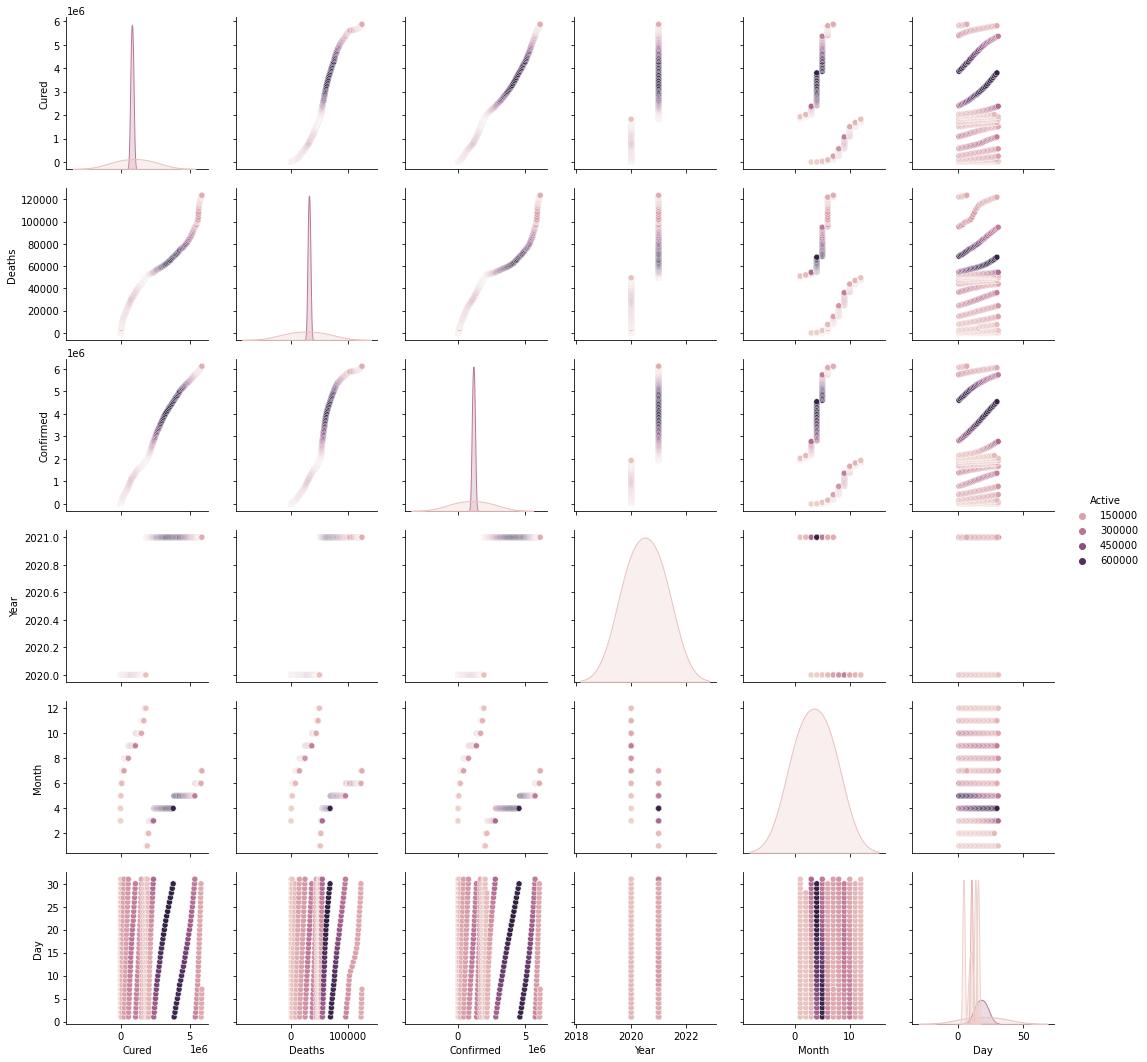

In [90]:
fig = plt.figure(figsize=(10,6))
sns.pairplot(maha,hue='Active')
plt.show()

<Figure size 720x432 with 0 Axes>

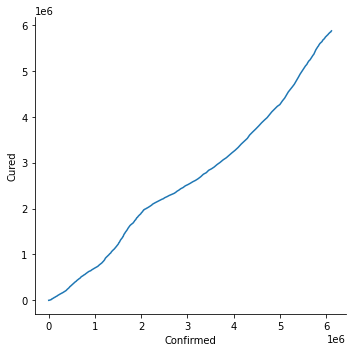

In [91]:
fig = plt.figure(figsize=(10,6))
sns.relplot(x='Confirmed',y='Cured',data=maha,kind='line')
plt.show()

<Figure size 720x432 with 0 Axes>

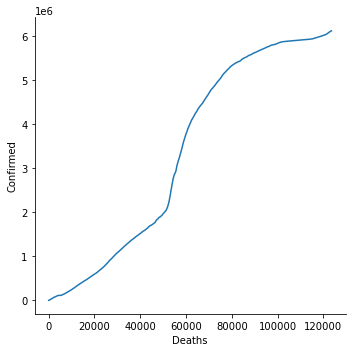

In [92]:
fig = plt.figure(figsize=(10,6))
sns.relplot(x='Deaths',y='Confirmed',data=maha,kind='line')
plt.show()

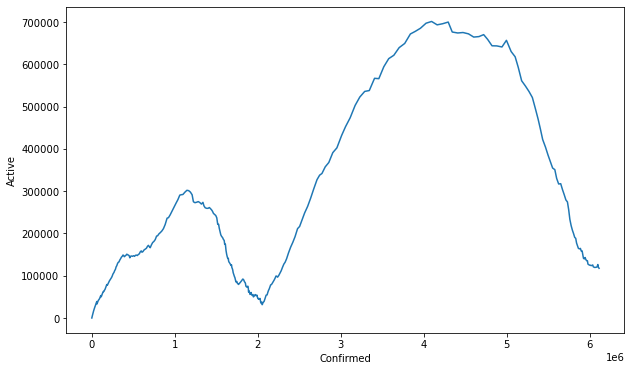

In [93]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(y='Active',x='Confirmed',data=maha)
plt.show()

In [94]:
fig=px.histogram(x='Confirmed',data_frame=maha,title='Total Confirmed Count of Maharashtra')
fig.update_traces(marker_line_width=1,marker_line_color='red')

In [95]:

fig = px.scatter(data_frame=maha, x="Date", y="Cured", title='Cured Cases in Maharashtra')
fig.show()

In [96]:
fig = px.line(data_frame=maha, x="Date", y="Deaths", title='Deaths Cases in Maharashtra')
fig.show()

In [97]:
fig = px.line(data_frame=maha, x="Date", y="Active", title='Active Cases in Maharashtra')
fig.show()

In [98]:
fig = px.line(data_frame=maha, x="Date", y="Confirmed", title='Confirmed Cases in Maharashtra')
fig.show()

In [99]:
maha_cured_sum = maha['Cured'].sum()
maha_cured_sum

813788907

In [100]:
maha_deaths_sum = maha['Deaths'].sum()
maha_deaths_sum

19314532

In [101]:
maha_confirmed_sum = maha['Confirmed'].sum()
maha_confirmed_sum

908892470

In [102]:
maha_active_sum = maha['Active'].sum()
maha_active_sum

75789031

In [103]:
result=np.array([maha_cured_sum,maha_deaths_sum,maha_confirmed_sum,maha_active_sum])
lable = ["Total Cured","Total Deaths","Total Confirmed","Active Cases"]
e = [0.0,0.2,0.0,0.1]

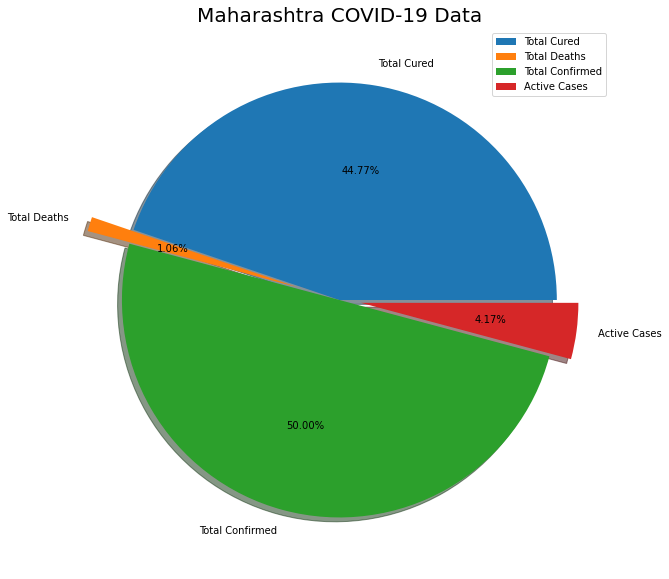

In [104]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)

plt.pie(result,labels=lable,autopct='%1.2f%%',explode=e,shadow=True)
plt.title("Maharashtra COVID-19 Data",size=20,color='k')
plt.legend(lable)
plt.show()

# Date Wise Covid-19 Data of Maharashtra

In [105]:
maha['Year'].unique()

array([2020, 2021], dtype=int64)

In [111]:
maha_yearly_data=maha.groupby('Year')[['Cured','Deaths','Confirmed','Active']].sum().reset_index()
maha_yearly_data

Year      Cured    Deaths  Confirmed    Active
0  2020  187034270   6184938  222900632  29681424
1  2021  626754637  13129594  685991838  46107607

In [112]:
px.bar(maha_yearly_data, x='Year', y=['Cured','Deaths','Active'],labels={'value':'Total Cases'},
      title="Maharashtra Year Wise Cases 2020 Vs 2021")

In [122]:
maha_monthly_data=maha.groupby(['Year','Month'])[['Cured','Deaths','Active','Confirmed']].sum().reset_index()
maha_monthly_data

Year  Month      Cured   Deaths    Active  Confirmed
0   2020      3        131       49      1567       1747
1   2020      4      13946     5354     87738     107038
2   2020      5     278831    35892    699395    1014118
3   2020      6    1645719   141287   1567368    3354374
4   2020      7    4906066   342978   3525455    8774499
5   2020      8   12695192   609995   4922664   18227851
6   2020      9   23832012   908307   7822361   32562680
7   2020     10   40815564  1269079   6066289   48150932
8   2020     11   48214136  1372935   2814126   52401197
9   2020     12   54632673  1499062   2174461   58306196
10  2021      1   58313365  1559536   1560294   61433195
11  2021      2   55303793  1442941   1246207   57992941
12  2021      3   67054059  1644545   5174645   73873249
13  2021      4   89845420  1795338  17453798  109094556
14  2021      5  145968060  2518750  15072468  163559278
15  2021      6  169356588  3309568   4755838  177421994
16  2021      7   40913352   858916    844357   42616625

In [153]:
px.bar(maha_monthly_data, x='Month', y=['Cured','Deaths','Active','Confirmed'],labels={'value':'Total Cases'},hover_data=['Year'],
      title="Maharashtra Month Wise Cases 2020 and 2021")

In [149]:
maha_daily_data=maha.groupby('Day')[['Cured','Deaths','Active','Confirmed']].sum()
maha_daily_data

Cured  Deaths   Active  Confirmed
Day                                      
1    28502795  671418  2517739   31691952
2    28705621  675239  2513821   31894681
3    28891775  678691  2525002   32095468
4    29099470  682181  2514001   32295652
5    29300242  686996  2519299   32506537
6    29483671  690680  2535271   32709622
7    29677537  694557  2561712   32933806
8    23967103  574368  2478722   27020193
9    24178446  577963  2468515   27224924
10   24377326  581289  2467463   27426078
11   24575007  585843  2442015   27602865
12   24762640  591370  2450733   27804743
13   24972625  596086  2445214   28013925
14   25128349  601768  2482311   28212428
15   25309260  605938  2488038   28403236
16   25510779  610594  2468902   28590275
17   25696275  616353  2472008   28784636
18   25881287  620316  2477835   28979438
19   26074231  624381  2484121   29182733
20   26273293  627784  2482733   29383810
21   26467406  631671  2490152   29589229
22   26685958  635536  2473251   29794745
23   26887754  638880  2469316   29995950
24   27086246  643384  2470901   30200531
25   27281221  646918  2477519   30405658
26   27472257  651119  2489912   30613288
27   27657098  654846  2497452   30809396
28   27839463  658807  2520080   31018350
29   26005105  610463  2448175   29063743
30   26204715  614151  2437315   29256181
31   13833952  334942  1219503   15388397